## Name : Mehraiel Mina 
#### Group 2 Smart

In [ ]:
import tensorflow.keras as keras
import tensorflow as tf
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.models import load_model
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Plotting Sample of data

170508288/170498071 [==============================] - 3s 0us/step


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


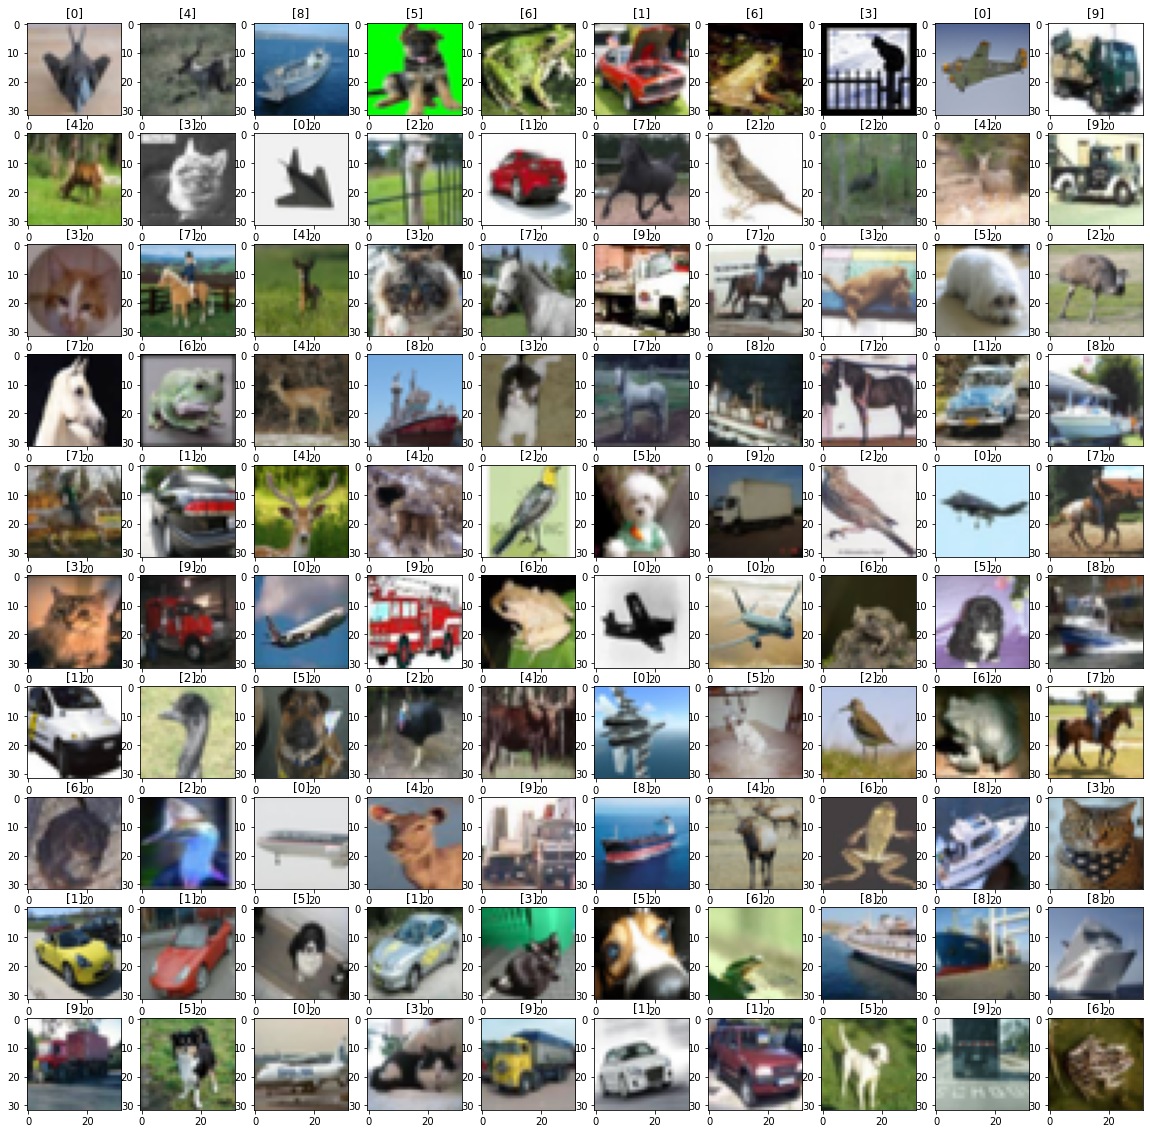

In [ ]:
(train_imgs,train_labels) , (test_imgs,test_labels) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(train_imgs,train_labels,test_size=100,stratify=train_labels)

fig, ax = plt.subplots(10, 10,figsize=(20, 20))
x_k = 0

for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_val[x_k], aspect='auto')
        ax[i][j].title.set_text(y_val[x_k])
        x_k += 1
 
plt.show()

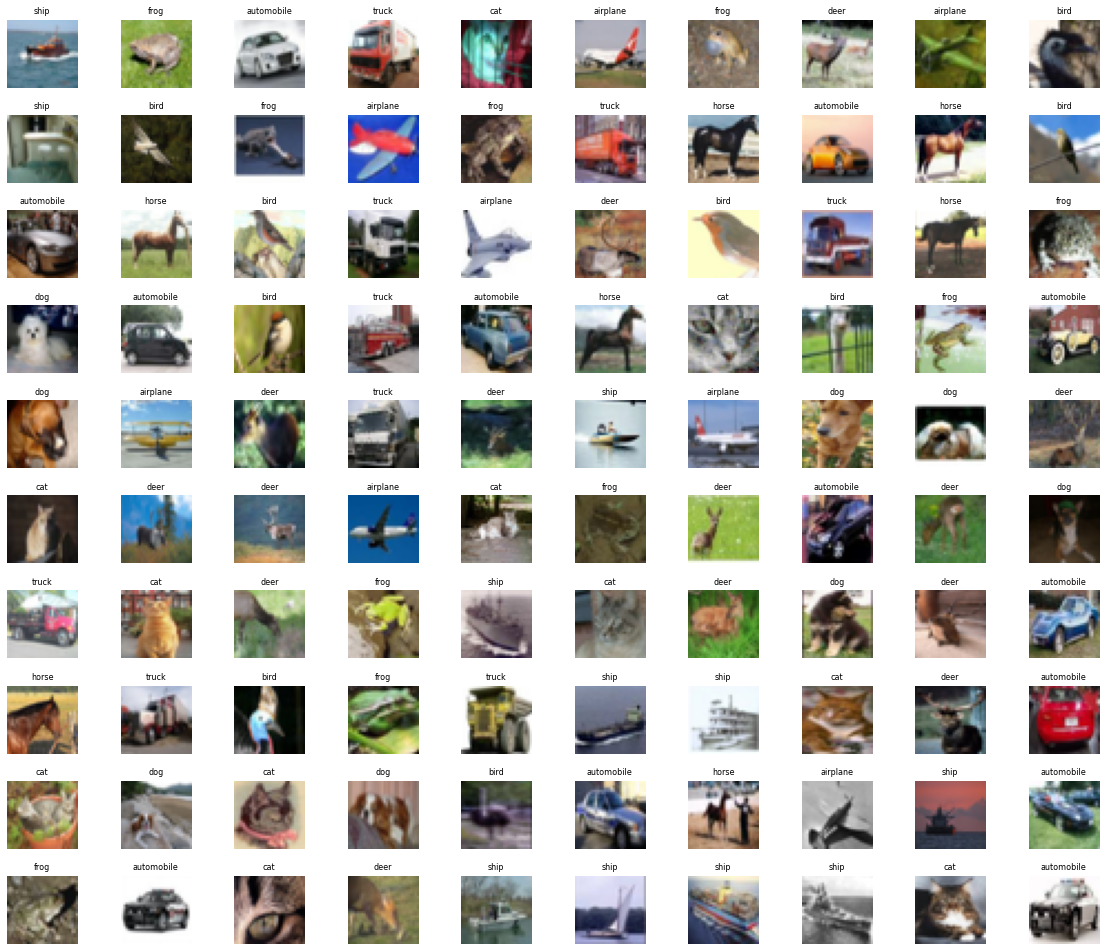

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes = plt.subplots(10, 10, figsize = (20,17))
axes = axes.ravel()
n_train = len(train_imgs) 
for i in np.arange(0, 10 * 10): 
    index = np.random.randint(0, n_train)
    axes[i].imshow(train_imgs[index,1:])
    label_index = int(train_labels[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# I.Without Data Augmentation

In [ ]:
(train_imgs,train_labels) , (test_imgs,test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
train_imgs, valid_imgs , train_labels , valid_labels , = train_test_split(train_imgs,train_labels,test_size=0.2,random_state=42)

In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
train_imgs = train_imgs.astype('float32') / 255
valid_imgs = valid_imgs.astype('float32') / 255
test_imgs = test_imgs.astype('float32') / 255


In [ ]:
train_labels = to_categorical(train_labels)
valid_labels = to_categorical(valid_labels)
print(train_labels.shape)
print(valid_labels.shape)

(40000, 10)
(10000, 10)


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [ ]:
history = model.fit(train_imgs,train_labels,batch_size=265,epochs=15,validation_data=(valid_imgs,valid_labels))

Epoch 1/15
151/151 [==============================] - 48s 308ms/step - loss: 1.7988 - accuracy: 0.3434 - val_loss: 1.5088 - val_accuracy: 0.4552
Epoch 2/15
151/151 [==============================] - 40s 263ms/step - loss: 1.4310 - accuracy: 0.4855 - val_loss: 1.3596 - val_accuracy: 0.5114
Epoch 3/15
151/151 [==============================] - 36s 241ms/step - loss: 1.3147 - accuracy: 0.5315 - val_loss: 1.2710 - val_accuracy: 0.5443
Epoch 4/15
151/151 [==============================] - 42s 278ms/step - loss: 1.2381 - accuracy: 0.5634 - val_loss: 1.2196 - val_accuracy: 0.5720
Epoch 5/15
151/151 [==============================] - 37s 243ms/step - loss: 1.1683 - accuracy: 0.5891 - val_loss: 1.1477 - val_accuracy: 0.5905
Epoch 6/15
151/151 [==============================] - 38s 253ms/step - loss: 1.1192 - accuracy: 0.6080 - val_loss: 1.1085 - val_accuracy: 0.6166
Epoch 7/15
151/151 [==============================] - 37s 246ms/step - loss: 1.0555 - accuracy: 0.6298 - val_loss: 1.0596 - val_ac

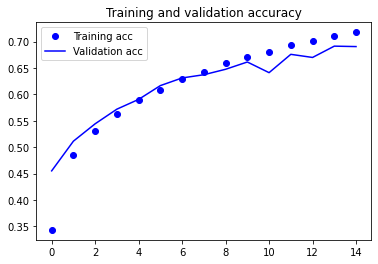

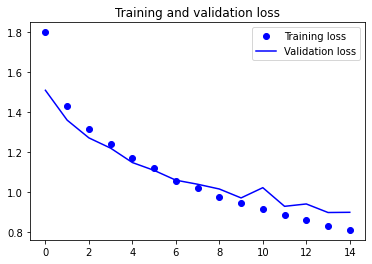

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/deep learning/CIFAR10_without_aug.h5')

In [ ]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/deep learning/CIFAR10_rescale.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

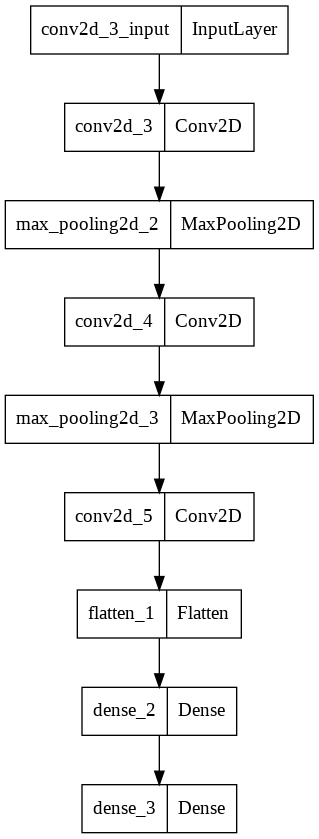

In [ ]:
plot_model(model)

# II.With Data Augmentation


### A) Rescale Only

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
(train_imgs,train_labels) , (test_imgs,test_labels) = cifar10.load_data()
train_imgs, valid_imgs , train_labels , valid_labels , = train_test_split(train_imgs,train_labels,test_size=0.2,random_state=42)

In [ ]:
train_labels = to_categorical(train_labels)
valid_labels = to_categorical(valid_labels)
test_labels = to_categorical(test_labels)
print(train_labels.shape)
print(valid_labels.shape)
print(test_labels.shape)

(40000, 10)
(10000, 10)
(10000, 10)


In [ ]:
train_generator = train_datagen.flow(
        train_imgs,train_labels,
        batch_size=20)

In [ ]:
validation_generator = valid_datagen.flow(
        valid_imgs,valid_labels,
        batch_size=20)

In [ ]:
test_generator = test_datagen.flow(
        test_imgs,test_labels,
        batch_size=20)

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 32, 32, 3)
labels batch shape: (20, 10)


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [ ]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


100/100 [==============================] - 4s 35ms/step - loss: 2.2039 - accuracy: 0.1570 - val_loss: 2.0643 - val_accuracy: 0.1790
Epoch 2/50
100/100 [==============================] - 4s 41ms/step - loss: 1.9570 - accuracy: 0.2810 - val_loss: 1.8206 - val_accuracy: 0.3320
Epoch 3/50
100/100 [==============================] - 3s 31ms/step - loss: 1.8300 - accuracy: 0.3160 - val_loss: 1.7254 - val_accuracy: 0.3710
Epoch 4/50
100/100 [==============================] - 3s 26ms/step - loss: 1.7339 - accuracy: 0.3510 - val_loss: 1.6065 - val_accuracy: 0.3990
Epoch 5/50
100/100 [==============================] - 3s 28ms/step - loss: 1.6195 - accuracy: 0.4000 - val_loss: 1.5159 - val_accuracy: 0.4430
Epoch 6/50
100/100 [==============================] - 3s 28ms/step - loss: 1.5874 - accuracy: 0.4100 - val_loss: 1.4756 - val_accuracy: 0.4510
Epoch 7/50
100/100 [==============================] - 3s 27ms/step - loss: 1.5075 - accuracy: 0.4350 - val_loss: 1.4930 - val_accuracy: 0.4680
Epoch 8/50

In [ ]:
model.evaluate(test_imgs,test_labels)

313/313 [==============================] - 4s 13ms/step - loss: 290.0131 - accuracy: 0.3703


[290.0130920410156, 0.3702999949455261]

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/deep learning/CIFAR10_rescale.h5')

In [ ]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/deep learning/CIFAR10_rescale.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [ ]:
prediction = model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

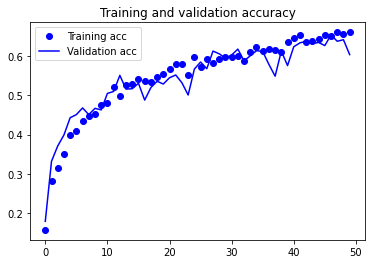

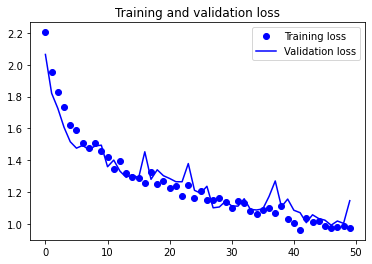

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

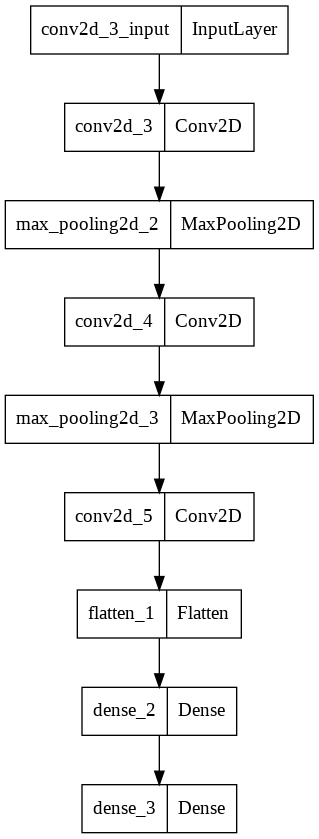

In [ ]:
plot_model(model)

### B) Different/Many Data Augmentation Types 


- Make augmentation on Training and rescale only on Validation

In [ ]:
(train_imgs,train_labels) , (test_imgs,test_labels) = cifar10.load_data()
# train_imgs, valid_imgs , train_labels , valid_labels , = train_test_split(train_imgs,train_labels,test_size=0.2,random_state=42)

In [ ]:
train_labels = to_categorical(train_labels)
# valid_labels = to_categorical(valid_labels)
test_labels = to_categorical(test_labels)
print(train_labels.shape)
# print(valid_labels.shape)
print(test_labels.shape)

(50000, 10)
(10000, 10)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


# valid_datagen = ImageDataGenerator(rescale=1./255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)



In [ ]:
train_generator = train_datagen.flow(
        train_imgs,train_labels,
        batch_size=40)

In [ ]:
# valid_generator = valid_datagen.flow(
#         valid_imgs,valid_labels,
#         batch_size=20)

In [ ]:
test_generator = test_datagen.flow(
        test_imgs,test_labels,
        batch_size=20)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32,3)))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                  

In [ ]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

- 20 epoches

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=1000,
      epochs=20,
      validation_data=test_generator,
      validation_steps=50)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


1000/1000 [==============================] - 272s 272ms/step - loss: 1.8975 - accuracy: 0.2898 - val_loss: 1.5659 - val_accuracy: 0.4340
Epoch 2/20
1000/1000 [==============================] - 265s 265ms/step - loss: 1.6576 - accuracy: 0.3875 - val_loss: 1.4097 - val_accuracy: 0.4690
Epoch 3/20
1000/1000 [==============================] - 266s 266ms/step - loss: 1.5368 - accuracy: 0.4381 - val_loss: 1.2777 - val_accuracy: 0.5410
Epoch 4/20
1000/1000 [==============================] - 270s 270ms/step - loss: 1.4454 - accuracy: 0.4787 - val_loss: 1.3745 - val_accuracy: 0.5180
Epoch 5/20
1000/1000 [==============================] - 262s 262ms/step - loss: 1.3773 - accuracy: 0.5014 - val_loss: 1.1390 - val_accuracy: 0.5720
Epoch 6/20
1000/1000 [==============================] - 264s 264ms/step - loss: 1.3224 - accuracy: 0.5224 - val_loss: 1.1483 - val_accuracy: 0.5950
Epoch 7/20
1000/1000 [==============================] - 279s 279ms/step - loss: 1.2923 - accuracy: 0.5359 - val_loss: 1.090

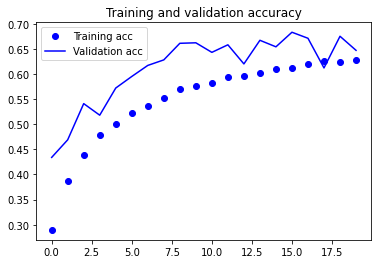

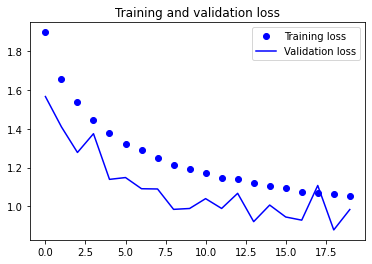

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/deep learning/CIFAR10_agumentation20.h5')


In [ ]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/deep learning/CIFAR10_agumentation20.h5')


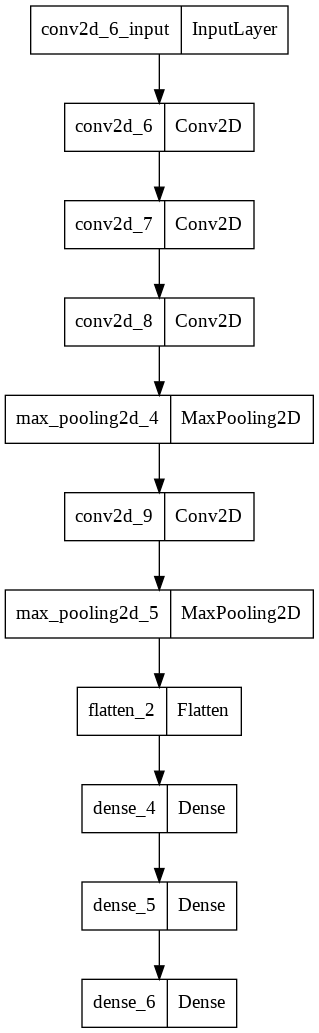

In [ ]:
plot_model(model)

- make augmentation on Validation as well as on Training 

In [ ]:
(train_imgs,train_labels) , (test_imgs,test_labels) = cifar10.load_data()
train_imgs, valid_imgs , train_labels , valid_labels  = train_test_split(train_imgs,train_labels,test_size=0.2,random_state=42)

170508288/170498071 [==============================] - 13s 0us/step


In [ ]:
train_labels = to_categorical(train_labels)
valid_labels = to_categorical(valid_labels)
test_labels = to_categorical(test_labels)
print(train_labels.shape)
print(valid_labels.shape)
print(test_labels.shape)

(40000, 10)
(10000, 10)
(10000, 10)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


valid_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)



In [ ]:
train_generator = train_datagen.flow(
        train_imgs,train_labels,
        batch_size=40)

In [ ]:
valid_generator = valid_datagen.flow(
        valid_imgs,valid_labels,
        batch_size=40)

In [ ]:
test_generator = test_datagen.flow(
        test_imgs,test_labels,
        batch_size=40)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32,3)))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                  

In [ ]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=1000,
      epochs=20,
      validation_data=valid_generator,
      validation_steps=50)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


1000/1000 [==============================] - 267s 267ms/step - loss: 1.9041 - accuracy: 0.2934 - val_loss: 1.7641 - val_accuracy: 0.3510
Epoch 2/20
1000/1000 [==============================] - 264s 264ms/step - loss: 1.6618 - accuracy: 0.3928 - val_loss: 1.5658 - val_accuracy: 0.4120
Epoch 3/20
1000/1000 [==============================] - 264s 264ms/step - loss: 1.5379 - accuracy: 0.4372 - val_loss: 1.4535 - val_accuracy: 0.4615
Epoch 4/20
1000/1000 [==============================] - 267s 267ms/step - loss: 1.4426 - accuracy: 0.4800 - val_loss: 1.4387 - val_accuracy: 0.4750
Epoch 5/20
1000/1000 [==============================] - 266s 266ms/step - loss: 1.3753 - accuracy: 0.5041 - val_loss: 1.3776 - val_accuracy: 0.5070
Epoch 6/20
1000/1000 [==============================] - 267s 267ms/step - loss: 1.3309 - accuracy: 0.5239 - val_loss: 1.2903 - val_accuracy: 0.5445
Epoch 7/20
1000/1000 [==============================] - 272s 272ms/step - loss: 1.2946 - accuracy: 0.5393 - val_loss: 1.283

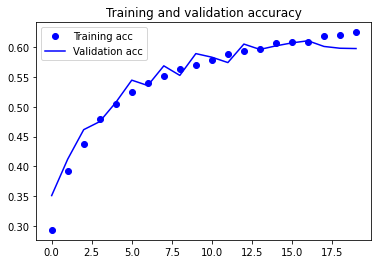

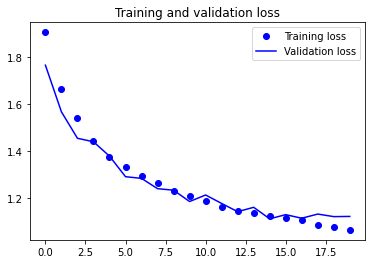

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/deep learning/CIFAR10_agumentation_all20.h5')


In [ ]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/deep learning/CIFAR10_agumentation_all20.h5')


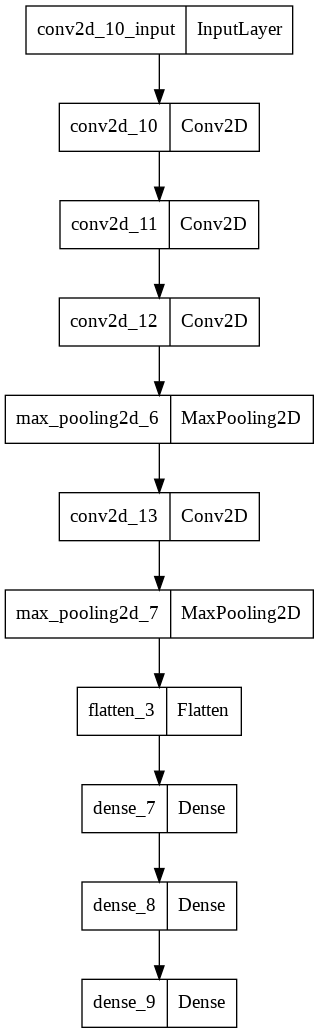

In [ ]:
plot_model(model)

In [ ]:
# 2 methods for evaluate --> give same result
scores = model.evaluate(test_generator)
print(scores)
print("%s%s: %.2f%%" % ("evaluate ",model.metrics_names[1], scores[1]*100))

scores = model.evaluate_generator(test_generator)
print(scores)
print("%s%s: %.2f%%" % ("evaluate_generator ",model.metrics_names[1], scores[1]*100))

250/250 [==============================] - 18s 71ms/step - loss: 0.9441 - accuracy: 0.6803
[0.9440515637397766, 0.6802999973297119]
evaluate accuracy: 68.03%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[0.9440518617630005, 0.6802999973297119]
evaluate_generator accuracy: 68.03%


- 100 epoches

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=1000,
      epochs=100,
      validation_data=test_generator,
      validation_steps=50)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


1000/1000 [==============================] - 40s 29ms/step - loss: 1.8862 - accuracy: 0.2929 - val_loss: 1.6179 - val_accuracy: 0.4175
Epoch 2/100
1000/1000 [==============================] - 25s 25ms/step - loss: 1.6542 - accuracy: 0.3892 - val_loss: 1.4248 - val_accuracy: 0.4720
Epoch 3/100
1000/1000 [==============================] - 24s 24ms/step - loss: 1.5174 - accuracy: 0.4505 - val_loss: 1.2646 - val_accuracy: 0.5415
Epoch 4/100
1000/1000 [==============================] - 24s 24ms/step - loss: 1.4224 - accuracy: 0.4834 - val_loss: 1.2413 - val_accuracy: 0.5530
Epoch 5/100
1000/1000 [==============================] - 24s 24ms/step - loss: 1.3498 - accuracy: 0.5142 - val_loss: 1.1914 - val_accuracy: 0.5825
Epoch 6/100
1000/1000 [==============================] - 24s 24ms/step - loss: 1.3040 - accuracy: 0.5347 - val_loss: 1.2589 - val_accuracy: 0.5610
Epoch 7/100
1000/1000 [==============================] - 24s 24ms/step - loss: 1.2656 - accuracy: 0.5490 - val_loss: 1.0611 - val_

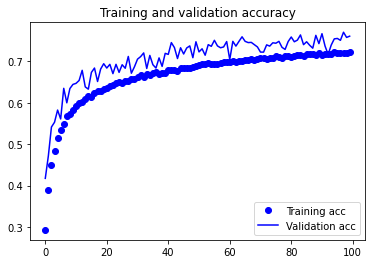

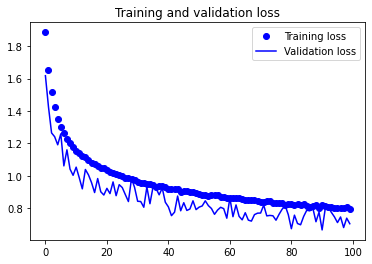

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/deep learning/CIFAR10_agumentation_100.h5')


In [ ]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/deep learning/CIFAR10_agumentation_100.h5')


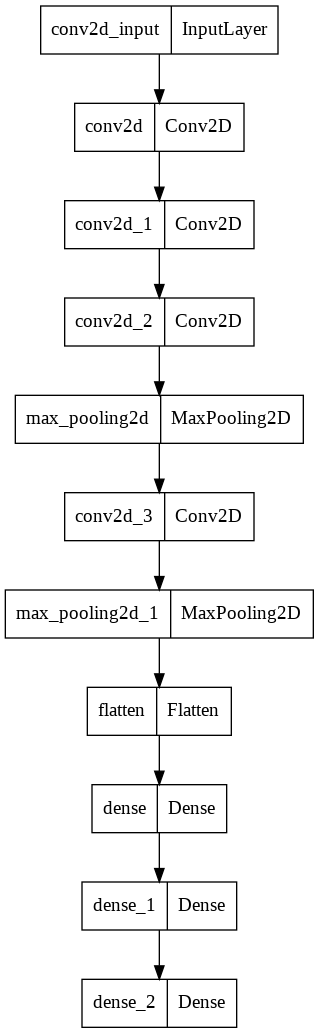

In [ ]:
plot_model(model)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                    

In [ ]:
scores = model.evaluate_generator(test_generator)
print(scores)
print("%s%s: %.2f%%" % ("evaluate_generator ",model.metrics_names[1], scores[1]*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.7158865928649902, 0.7591000199317932]
evaluate_generator accuracy: 75.91%


----

# III.Transfer learning 

In [ ]:
import tensorflow.keras as keras
import tensorflow as tf
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from keras.models import load_model
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [ ]:
import keras
from keras.applications.vgg16 import VGG16
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(32, 32, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
(train_imgs,train_labels) , (test_imgs,test_labels) = cifar10.load_data()
# train_imgs, valid_imgs , train_labels , valid_labels , = train_test_split(train_imgs,train_labels,test_size=0.2,random_state=42)

In [ ]:
print(train_imgs.shape , valid_imgs.shape , test_imgs.shape)
print(train_labels.shape , valid_labels.shape , test_labels.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (10000, 32, 32, 3)
(40000, 1) (10000, 1) (10000, 1)


In [ ]:
train_labels = to_categorical(train_labels)
valid_labels = to_categorical(valid_labels)
# test_labels = to_categorical(test_labels)
print(train_labels.shape)
print(valid_labels.shape)
# print(test_labels.shape)

(40000, 10)
(10000, 10)


In [ ]:
datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

batch_size = 20

def extract_features(sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count,10))
    generator = datagen.flow(train_imgs,train_labels,batch_size=20)
    i = 0
    
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(40000)
validation_features, validation_labels = extract_features(10000)
# test_features, test_labels = extract_features(10000)

In [ ]:
print(train_features.shape , validation_features.shape )
      # , test_features.shape)
print(train_labels.shape , validation_labels.shape )
      # , test_labels.shape)

(40000, 4, 4, 512) (10000, 4, 4, 512)
(40000, 10) (10000, 10)


In [ ]:
train_features = np.reshape(train_features, (40000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (10000, 4 * 4 * 512))
# test_features = np.reshape(test_features, (10000, 4 * 4 * 512))

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [ ]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

- 10 epoches

In [ ]:
history = model.fit(train_features, train_labels,
                    epochs=10,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/10
2000/2000 [==============================] - 9s 4ms/step - loss: 1.6738 - accuracy: 0.4027 - val_loss: 3.3124 - val_accuracy: 0.0990
Epoch 2/10
2000/2000 [==============================] - 11s 5ms/step - loss: 1.5259 - accuracy: 0.4606 - val_loss: 3.5225 - val_accuracy: 0.0979
Epoch 3/10
2000/2000 [==============================] - 8s 4ms/step - loss: 1.4758 - accuracy: 0.4798 - val_loss: 3.4308 - val_accuracy: 0.1024
Epoch 4/10
2000/2000 [==============================] - 8s 4ms/step - loss: 1.4349 - accuracy: 0.4914 - val_loss: 3.6456 - val_accuracy: 0.0973
Epoch 5/10
2000/2000 [==============================] - 8s 4ms/step - loss: 1.4105 - accuracy: 0.5028 - val_loss: 3.6961 - val_accuracy: 0.0990
Epoch 6/10
2000/2000 [==============================] - 8s 4ms/step - loss: 1.3800 - accuracy: 0.5138 - val_loss: 3.8102 - val_accuracy: 0.0970
Epoch 7/10
2000/2000 [==============================] - 8s 4ms/step - loss: 1.3571 - accuracy: 0.5221 - val_loss: 4.0660 - val_accuracy

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- 20 epoches

In [ ]:
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
2000/2000 [==============================] - 9s 4ms/step - loss: 1.7246 - accuracy: 0.3869 - val_loss: 3.2667 - val_accuracy: 0.0998
Epoch 2/30
2000/2000 [==============================] - 7s 4ms/step - loss: 1.5361 - accuracy: 0.4572 - val_loss: 3.4212 - val_accuracy: 0.0985
Epoch 3/30
2000/2000 [==============================] - 7s 4ms/step - loss: 1.4814 - accuracy: 0.4773 - val_loss: 3.3845 - val_accuracy: 0.0977
Epoch 4/30
2000/2000 [==============================] - 7s 4ms/step - loss: 1.4450 - accuracy: 0.4932 - val_loss: 3.3567 - val_accuracy: 0.0996
Epoch 5/30
2000/2000 [==============================] - 7s 4ms/step - loss: 1.4180 - accuracy: 0.5013 - val_loss: 3.4326 - val_accuracy: 0.0983
Epoch 6/30
2000/2000 [==============================] - 8s 4ms/step - loss: 1.3950 - accuracy: 0.5126 - val_loss: 3.4044 - val_accuracy: 0.1006
Epoch 7/30
2000/2000 [==============================] - 8s 4ms/step - loss: 1.3807 - accuracy: 0.5208 - val_loss: 3.5323 - val_accuracy:

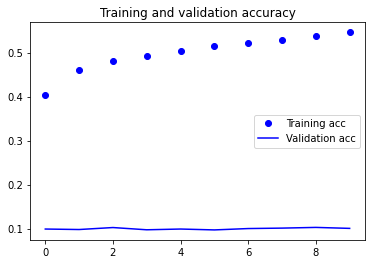

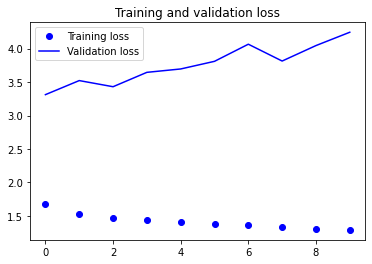

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

----

# IV.Visualization

In [ ]:
import tensorflow.keras as keras
import tensorflow as tf
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from keras.models import load_model
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [ ]:
(train_imgs,train_labels) , (test_imgs,test_labels) = cifar10.load_data()

(1, 32, 32, 3)


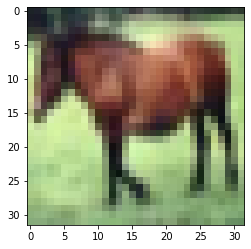

In [ ]:
img_trial = train_imgs[7]

from keras.preprocessing import image
import numpy as np

img_tensor = image.img_to_array(img_trial)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)
plt.imshow(img_tensor[0])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32,3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 128)      0         
 )                                                               
                                                        

In [ ]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activation_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 128)      0     

In [ ]:
activations = activation_model.predict(img_tensor)
len(activations)

6

(1, 30, 30, 32)


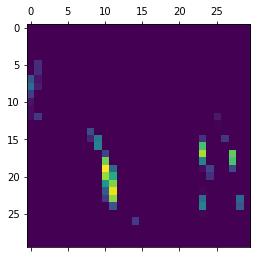

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

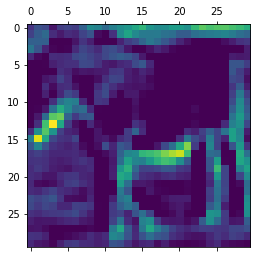

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


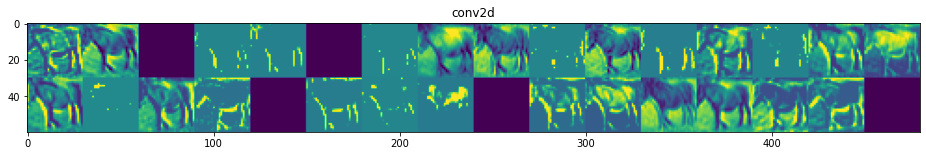

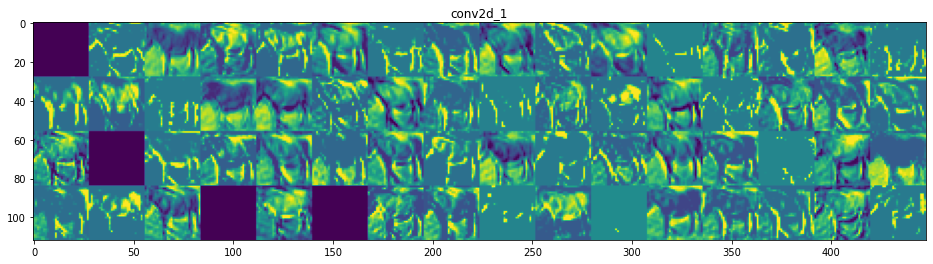

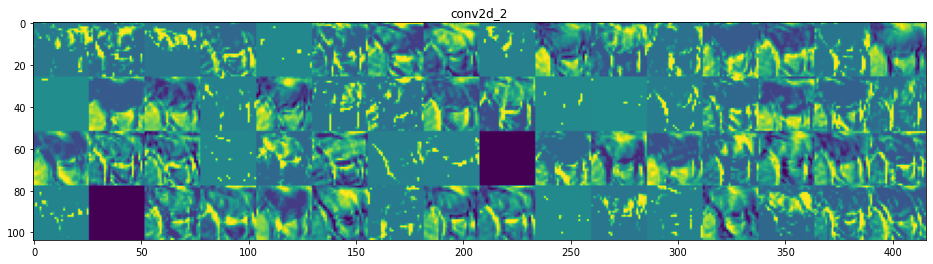

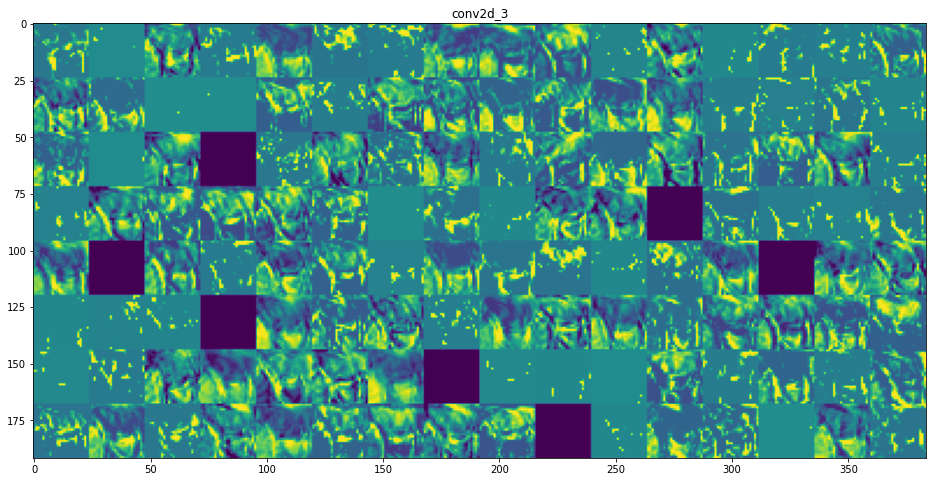

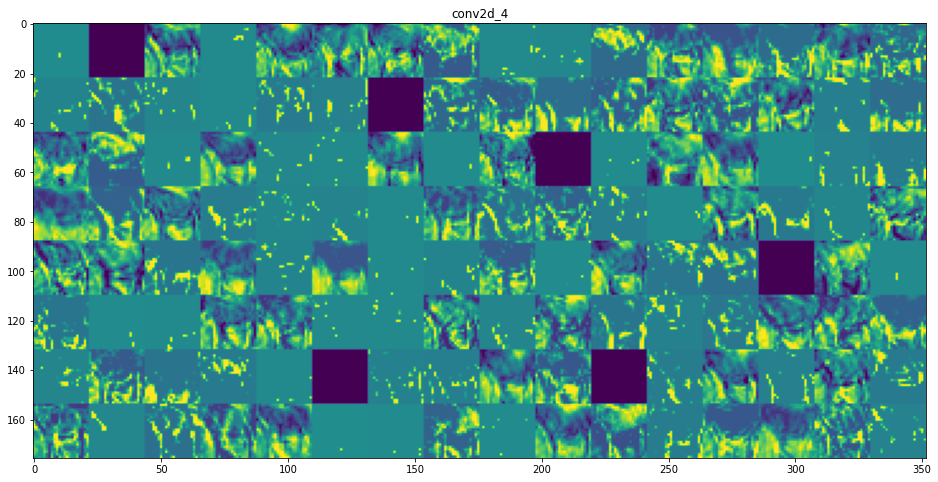

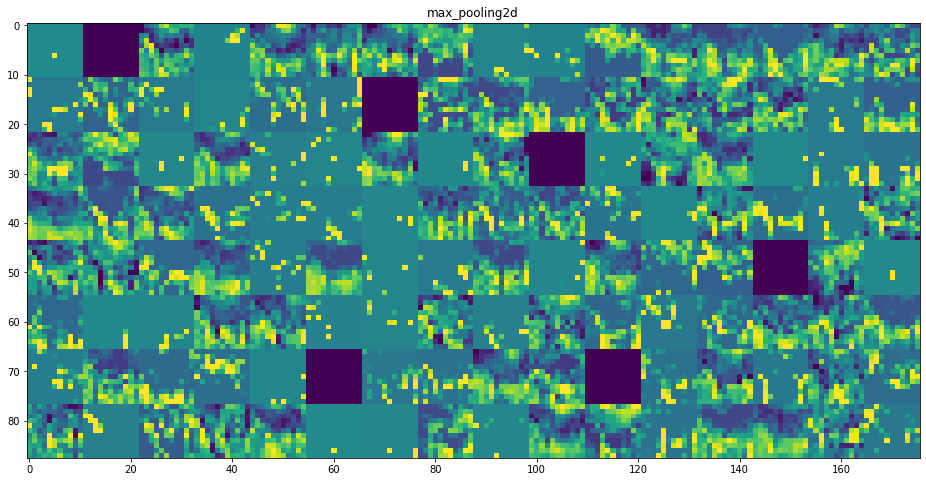

In [ ]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()